In [11]:
from scipy.stats import norm, bootstrap
import numpy as np
from matplotlib.pyplot import vlines, show, legend
import seaborn as sns

In [12]:
seed = 42
np.random.seed(seed)

In [13]:
mu = 0
std = 1

alpha = 0.05
N = 1000

norm_rv = norm(mu, std)
norm_rvs = norm_rv.rvs(size=N)
# norm_rvs

# Ручное исследование методом bootstrap

In [14]:
B = 100000

mass_test = [norm_rvs[np.random.choice(len(norm_rvs), size=N)] for _ in range(B)]
# mass_test

In [15]:
mass_params = [sample.mean() for sample in mass_test]
# mass_params

In [16]:
total_sample_param = sum(mass_params) / B
total_sample_param

0.019400540160673076

## Доверительный интервал методом перцентилей

In [17]:
index_l = int(B * alpha / 2)
index_r = int(B * (1 - alpha / 2))
print(index_l, index_r)

ci_p = [mass_params[index_l], mass_params[index_r]]
ci_p

2500 97500


[-0.023876987716435837, 0.017888269846760677]

## Доверительный интервал методом квантилей

In [18]:
std_var = sum((param_i - total_sample_param) ** 2 for param_i in mass_params) / B

ci_q = [total_sample_param - norm.ppf(1 - alpha / 2) * (std_var / np.sqrt(N)),
        total_sample_param + norm.ppf(1 - alpha / 2) * (std_var / np.sqrt(N))]
ci_q

[0.019341051623289703, 0.01946002869805645]

# Исследование через scipy

In [19]:
bootstr = bootstrap((norm_rvs,), np.mean, n_resamples=B, confidence_level=1 - alpha)
ci_b = bootstr.confidence_interval
ci_b

ConfidenceInterval(low=-0.04077283776721286, high=0.08049040385912627)

# Графическое отображение

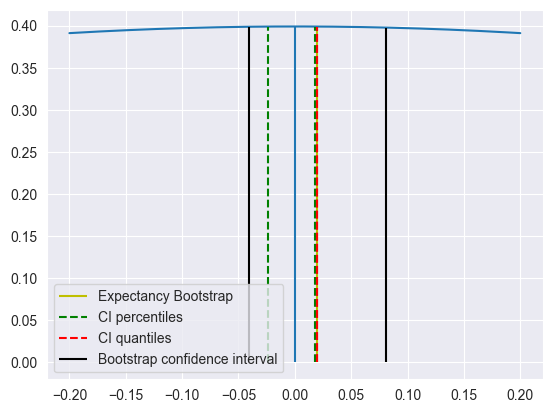

In [28]:
x = np.linspace(norm_rv.mean() - 0.2 * norm_rv.std(), norm_rv.mean() + 0.2 * norm_rv.std(), 1000)

sns.lineplot(x=x, y=norm_rv.pdf(x))
vlines(x=norm_rv.mean(), ymin=0, ymax=norm_rv.pdf(norm_rv.mean()))

vlines(x=total_sample_param, ymin=0, ymax=norm.pdf(total_sample_param), color='y', label='Expectancy Bootstrap')

vlines(x=ci_p, ymin=0, ymax=norm.pdf(ci_p), color='g', linestyles="--", label="CI percentiles")
vlines(x=ci_q, ymin=0, ymax=norm.pdf(ci_q), color='r', linestyles="--", label="CI quantiles")  # Очень маленькое расстояние между ними

vlines(x=ci_b, ymin=0, ymax=norm.pdf(ci_b), color='black', label="Bootstrap confidence interval")

legend()
show()

In [29]:
norm.pdf(total_sample_param)

0.39886721032644396